<a href="https://colab.research.google.com/github/damilola2010/2022-Tweet-Sentiment-Analysis/blob/main/2022_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The aim of this project was to use natural language processing techniques to conduct sentiment analysis on Twitter data. In January 2022, I wanted to gain insight into the feelings of Twitter users about the year. To complete the project, a number of Python libraries were utilized, including Pandas, Tweepy, NLTK, TextBlob, MatPlotlib, WordCloud, Emot, and Plotly. These libraries were used for tasks such as data cleaning, mining tweets, sentiment analysis, data exploration, identifying emojis, and data visualization.

### Install Necessary Lib and Packages

In [1]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 11.7 MB/s eta 0:00:00


In [2]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import tweepy
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
import csv

In [6]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [7]:
import glob # to retrieve files/pathnames matching a specified pattern. 
import random # generating random numbers
import pandas as pd # for data manipulation and analysis
import requests # to send HTTP requests
from PIL import Image # for opening, manipulating, and saving many different image file f
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import string # Inbuilt string library

# Mining Tweets

In [8]:
# Putting Twitter Api keys and Tokens
consumer_key = "Wqdwq2M7tkOVvY5lUTbV4feQ8"
consumer_secret = "KyeJFbGYNzWxR0s5nUe97aLBSFEF17cKQ9EgSQMBu1Yz2DZp8m"
access_token = "1321314967812034566-9vFJrCLeNr8sgGlOcsyk7cw71luyvu"
access_token_secret = "ERbnjWJ6rumv24meh9JxrqS2j6b3XBzP6zHpaDn5V91r9"


In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) # Pass in Consumer key and secret for authentication by API
auth.set_access_token(access_token, access_token_secret) # Pass in Access key and secret for authentication by API
api = tweepy.API(auth) 

In [13]:
tweet_list = [tweet for tweet in tweepy.Cursor(api.search,
                                q="2022 was a",
                                lang="en",
                                since_id="2022-12-12",
                                tweet_mode='extended').items(2000)]

## Processing Tweets

In [14]:

# Initialize the stemmer and stop words list
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

# Pre-process the tweets
processed_tweets = []
for tweet in tweet_list:
    # Remove special characters, URLs, and hashtags
    text = re.sub(r'[^a-zA-Z0-9]', ' ', tweet.full_text)
    text = re.sub(r'https?://\S+', ' ', text)
    text = re.sub(r'#', ' ', text)
    
    # Lowercase and split the text into words
    words = text.lower().split()
    
    # Remove stop words and stem the remaining words
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    # Join the stemmed words back into a single string
    processed_tweet = ' '.join(stemmed_words)
    


## Output Processed tweets to CSV

In [16]:


# Open the CSV file in write mode
with open('processed_tweets.csv', 'w', newline='', encoding='utf-8') as csv_file:
    # Create a CSV writer object
    writer = csv.writer(csv_file, delimiter=',')
    
  # Write the column names
    writer.writerow(['tweet_id', 'created_at', 'text', 'location', 'likes'])
    
    # Iterate through the processed tweets and write each row to the CSV file
    for tweet in tweet_list:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        likes = tweet.favorite_count
        writer.writerow([tweet_id, created_at, text, location, likes])

In [17]:
# Load the CSV file into a DataFrame
df = pd.read_csv("processed_tweets.csv")

# Print the first few rows of the DataFrame
df.head()

,tweet_id,created_at,text,location,likes
0,1611282681345757185,2023-01-06 08:45:02,@yakyucosmo I know there are a lot of opinions...,誰よりも侍っぽいスティーブン・クワン激推し🏟,0
1,1611282672495792128,2023-01-06 08:44:59,RT @On3sports: 🚨BREAKING🚨 Jackson State WR tra...,On The Field 🏈,0
2,1611282634243559424,2023-01-06 08:44:50,RT @thenewsmovement: Morning everyone! This is...,"West Midlands, England",0
3,1611282595433660416,2023-01-06 08:44:41,RT @mingaya_TEEZ: just wanted to remind everyo...,They/He/She/Any,0
4,1611282592539582466,2023-01-06 08:44:40,RT @thekhrc: This is a frightening crime but i...,Nairobi,0


## Exploratory Data Analysis

In [19]:
df.shape #Get number of rows and columns

(2000, 5)

In [20]:
df.duplicated(subset='tweet_id').sum() # Check for duplicate values

0

In [21]:
df.isna().any() # Check for "NaN" values

tweet_id      False
created_at    False
text          False
location       True
likes         False
dtype: bool

In [22]:
df['location']=df['location'].fillna('No location') # Replace "NaN" values with "No Location"

In [23]:
df.isna().any() # Check for "NaN" values

tweet_id      False
created_at    False
text          False
location      False
likes         False
dtype: bool

In [24]:
import plotly.express as px

# Group the DataFrame by location and count the number of tweets for each location
location_counts = df.groupby("location").size().reset_index(name="count")

# Creating a choropleth map showing the number of tweets per location
fig = px.choropleth(location_counts, 
                    locations="location", 
                    color="count",
                    title="Number of Tweets per Location",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


## Sentiment Analysis

In [25]:

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Define a function to compute the sentiment scores for a tweet
def get_sentiment_scores(tweet):
    scores = sia.polarity_scores(tweet)
    return scores['compound']

# Apply the get_sentiment_scores function to the text column of the DataFrame and store the result in a new column
df['sentiment'] = df['text'].apply(get_sentiment_scores)


In [26]:
df.head()

,tweet_id,created_at,text,location,likes,sentiment
0,1611282681345757185,2023-01-06 08:45:02,@yakyucosmo I know there are a lot of opinions...,誰よりも侍っぽいスティーブン・クワン激推し🏟,0,0.7991
1,1611282672495792128,2023-01-06 08:44:59,RT @On3sports: 🚨BREAKING🚨 Jackson State WR tra...,On The Field 🏈,0,0.4404
2,1611282634243559424,2023-01-06 08:44:50,RT @thenewsmovement: Morning everyone! This is...,"West Midlands, England",0,-0.3164
3,1611282595433660416,2023-01-06 08:44:41,RT @mingaya_TEEZ: just wanted to remind everyo...,They/He/She/Any,0,-0.2960
4,1611282592539582466,2023-01-06 08:44:40,RT @thekhrc: This is a frightening crime but i...,Nairobi,0,-0.8381


In [27]:
import plotly.graph_objects as go

# Create a histogram of the sentiment scores
fig = go.Figure(data=[go.Histogram(x=df['sentiment'])])
fig.update_layout(title_text='Sentiment Scores')
fig.show()


### Extracting Adjectives

In [28]:

nltk.download('averaged_perceptron_tagger')




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [30]:
>>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
# Defining a function to extract the adjectives from a tweet
def extract_adjectives(tweet):
    # Tokenize the tweet
    tokens = nltk.word_tokenize(tweet)
    
    # Performing part-of-speech tagging on the tokens
    pos_tags = nltk.pos_tag(tokens)
    
    # Extracting the adjectives from the pos tags
    adjectives = [word for word, pos in pos_tags if pos == 'JJ']
    
    return adjectives

# Applying the extract_adjectives function to the text column of the DataFrame and store the result in a new column
df['adjectives'] = df['text'].apply(extract_adjectives)

In [32]:
# Counting the frequency of each adjective in the adjectives column
adjective_counts = df['adjectives'].apply(pd.Series).stack().value_counts()

# Print the top 10 most frequent adjectives
print(adjective_counts[:10])



@            173
bg           145
streamed     145
first        108
old           80
last          77
bad           63
black         60
difficult     60
secret        55
dtype: int64


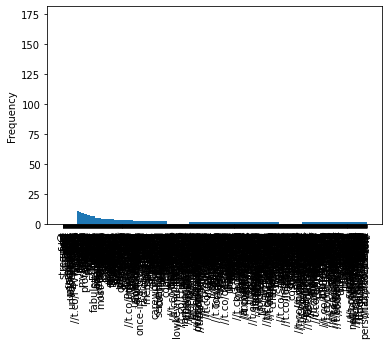

In [34]:
import matplotlib.pyplot as plt

# Getting the indices and values of the adjective counts
adjective_counts = df['adjectives'].apply(pd.Series).stack().value_counts()
adjective_indices = range(len(adjective_counts))
adjective_values = adjective_counts.values

# Creating the bar plot
plt.bar(adjective_indices, adjective_values)

# Setting the x-axis labels
plt.xticks(adjective_indices, adjective_counts.index, rotation='vertical')

# Setting the y-axis label
plt.ylabel('Frequency')


plt.show()


## Word Cloud

In [36]:
import numpy as np
from wordcloud import WordCloud
from PIL import Image




In [37]:
from google.colab import files

# Upload the image
uploaded = files.upload()




Saving twitter_logo.png to twitter_logo.png


In [38]:
# Getting the file name of the uploaded image
image_file = list(uploaded.keys())[0]

# Loading the image into a NumPy array
image = np.array(Image.open(image_file))

In [39]:


# Loading the Twitter logo image
twitter_logo = np.array(Image.open('twitter_logo.png'))








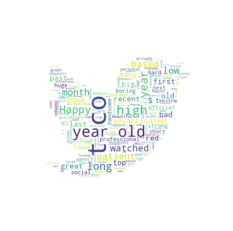

In [43]:
# Converting the adjective counts to a string
adjective_counts = df['adjectives'].apply(pd.Series).stack().value_counts()
adjective_string = ' '.join(adjective_counts.index)

# Creating the word cloud
wordcloud = WordCloud(mask=twitter_logo, background_color='white', width=3000, height=1500).generate(adjective_string)

# Displaying the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Top words in the word cloud

In [44]:
# Getting the word frequencies in the word cloud
word_frequencies = wordcloud.words_

# Sorting the word frequencies in descending order
sorted_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 words
for word, frequency in sorted_frequencies[:10]:
    print(f'{word}: {frequency}')


t co: 1.0
year old: 0.17647058823529413
high: 0.11764705882352941
year: 0.09803921568627451
long: 0.0784313725490196
Happy: 0.0784313725490196
s: 0.058823529411764705
month: 0.058823529411764705
low: 0.058823529411764705
watched: 0.058823529411764705
